In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
Category          962 non-null object
Resume            962 non-null object
cleaned_resume    962 non-null object
dtypes: object(3)
memory usage: 22.7+ KB


In [4]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [5]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Operations Manager           40
Sales                        40
Blockchain                   40
Mechanical Engineer          40
ETL Developer                40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


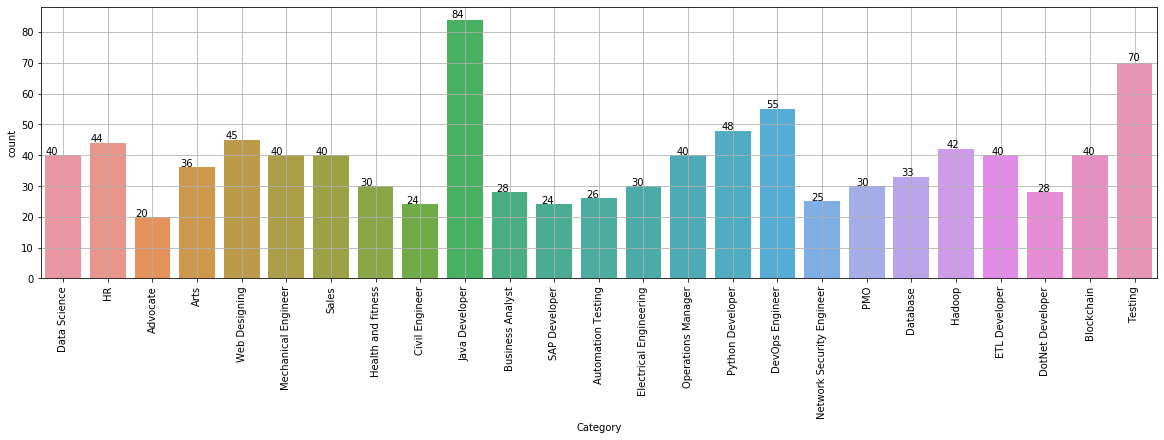

In [6]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [7]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [8]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [9]:
resumeDataSet_d=resumeDataSet.copy()

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize


for i in resumeDataSet['Resume'].values:
    tokenized_sents = word_tokenize(i) 
    stemmer=PorterStemmer()
    stem_words=stemmer.stem(tokenized_sents)

word_vectorizer = TfidfVectorizer( sublinear_tf=True,stop_words='english')
word_vectorizer.fit(stem_words)
WordFeatures = word_vectorizer.transform(stem_words)



In [10]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud





In [11]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


In [12]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])


In [22]:
pickle.dump(le, open("label_encoder.sav", "wb"))

In [13]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [14]:
resumeDataSet.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
18    40
16    40
10    40
3     40
22    40
6     40
1     36
7     33
19    30
14    30
11    30
4     28
9     28
2     26
17    25
5     24
21    24
0     20
Name: Category, dtype: int64

In [15]:
resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Operations Manager           40
Sales                        40
Blockchain                   40
Mechanical Engineer          40
ETL Developer                40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [16]:
del resumeDataSet_d #clearing the space occupied 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer( sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [18]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))



Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


In [19]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.89      1.00      0.94         8
           7       1.00      0.86      0.92         7
         

In [21]:
import pickle
filename = 'cv_evaluation.sav'
pickle.dump(clf, open(filename, 'wb'))

In [21]:
ramez_cv="""Ramez Noshy
Weissa
Contact
Address:
Heliopolis, Cairo, Egypt
Phone:
+20 127 418 2056
Email:
rameznoshy@gmail.com
GitHub:
https://github.com/rameziophobia
LinkedIn:
https://linkedin.com/in/ramez-noshy/
Programming
React/React native C++, C
Python Node.js/Express
Java, C# Flask, NestJs
SQL/NoSQL Redis
JavaScript/TS HTML, CSS
Skill Highlights
 Qt GUI toolkit
 Algorithms and Data Structure
 Software Design Patterns
 Solid design principles
React, Angular frameworks
OpenCV - computer vision
 Linux/Bash
 Git, GitHub Gitflow
 UML
 C++ STL
 Service-focused, Fast learner
Languages
Arabic – Native
English – Fluent
Spanish – Basic fluency
French – Basic fluency
German – Basic fluency (A1)
Education
Bachelor of Engineering: Graduated: Mar 2022
Computer Engineering and Software Systems
Ain Shams University, Cairo, Egypt CGPA: 3.75
Courses: Algorithms, Data Structure, OOP, Software Engineering,
Android, Computer Networks & Security, Operating Systems,
Distributed Computing, Computer Vision, Machine Learning, Agile
Experience
Company Internship – Microsoft ATLC
Software Engineering Intern 7/2021 to 9/2021
 Finetuned NLU, NLG models
 Converted models to ONNX (using Pytorch, Python)
 Evaluated ONNX conversion results, performance
 Refactored ONNX conversion script to easily support
conversion of new models
Company Internship – ISEC Cybersecurity
Backend Java/Node.js cybersecurity intern 10/2020 to 11/2020
 Refactored and redesigned a six-year-old legacy Java secure
archiving system by applying clean code design principles
 Designed an Ethereum blockchain layer in a MEAN stack app.
ASU Racing Team – Mate ROV Team
Software Member 09/2019 to 04/2020
 Wrote computer vision python scripts for autonomous ROV
underwater motion using OpenCV and Python
 Streamed video feed from ROV using gstreamer framework
 Designed a GUI interface using Qt C++
Used ROS for QT – Raspberry PI communication
Student Activity Volunteer – APEC
 IT Member – PHP, MySQL 09/2020 to 6/2021
Projects
 Graduation Project - Educate platform Jan-2022
 Implemented several screens using react native, redux, and
react query. Implemented uploading post materials to S3
(images, videos, PDFs), supports editing.
 Designed the CRUD Restful API for the backend – NestJS.
 Designed and implemented a scalable personalized feed
generation system using Queues, Redis, NestJS.
 TSP Optimization and Visualization Jun-2020
Used Python to solve and visualize the Travelling salesman
problem using the following algorithms: Genetic Algorithm,
PSO: Particle Swarm Optimization, Dynamic Programming,
Simulated Annealing, Greedy, Divide and Conquer

Projects
 Master Quiz Website OCT-2020
 Handled the backend using Node.js/MongoDB
 Designed and implemented Interactive group quiz sessions using sockets and Node.js (backend)
and Angular (frontend)
 CTV Mobile Application (freelance project) Mar-2021
 Built the profile, posts wall, news screen using React Native
 Set the organization and planning for the project collaboration
 Rosavicci Ecommerce Website (freelance project) Mar-2021
 Built shopping screen, cart screens using React.js and Next.js
 Shoot 'em up Game - Skull Reign 2019
 Top-down shooter game written in pure Java
 Implemented player, enemy and projectile logic
 YoutTube trailer
 Top video creator May-2020
 Wrote scripts that automate generating top 100 lists, scraps their data, and makes a video compilation
for youtube using beautifulSoup4, MoviePY – Python
 Reduced the time taken to make a video from days of manual work to 2 hours
 Book Spine Classifier May-2020
By referencing scientific papers, using OpenCV and Tesseract OCR implemented an OCR engine to detect
book covers and read their names, a flutter application that acts as a virtual bookshelf to scan book covers,
parse them on a server and send them back to the bookshelf.
 Auto Battler Networked Game – HexArena 2019
 2D two-player battling game written in C#
 Implemented A-star (A*) search to choose enemy targets
 Synchronized movements between hosts
 Other projects
 Clash Quest Guide App – React Native – 10K+ downloads on the play store 2021
 Multilevel feedback queue CPU scheduler (used in operating systems) visualisation in Python 2019
 Network on Chip (NOC) router using VHDL 2020
 Demo Hotel Chain database system (MySQL) 2020
 Tiny Scanner & Parser (compiler with GUI using C#) 2020
 Bubble Sheet Scanner (Optical Mark Recognition using Python and OpenCV) late 2019
 ICAMP (Arduino RC car; controlled via an android app) 2018
Certifications
Big Data Master Class – Sprints
Machine Learning – Coursera, Stanford University
Web Development Advanced – Udacity, EGFWD initiative
Web Development Professional – Udacity, EGFWD initiative
Build a Modern Computer from First Principles – Coursera, HUJI """

In [22]:
cleaned_ramezcv=cleanResume(ramez_cv)

In [23]:
print(cleaned_ramezcv)

Ramez Noshy Weissa Contact Address Heliopolis Cairo Egypt Phone 20 127 418 2056 Email rameznoshy GitHub LinkedIn Programming React React native C C Python Node js Express Java C Flask NestJs SQL NoSQL Redis JavaScript TS HTML CSS Skill Highlights Qt GUI toolkit Algorithms and Data Structure Software Design Patterns Solid design principles React Angular frameworks OpenCV computer vision Linux Bash Git GitHub Gitflow UML C STL Service focused Fast learner Languages Arabic Native English Fluent Spanish Basic fluency French Basic fluency German Basic fluency A1 Education Bachelor of Engineering Graduated Mar 2022 Computer Engineering and Software Systems Ain Shams University Cairo Egypt CGPA 3 75 Courses Algorithms Data Structure OOP Software Engineering Android Computer Networks Security Operating Systems Distributed Computing Computer Vision Machine Learning Agile Experience Company Internship Microsoft ATLC Software Engineering Intern 7 2021 to 9 2021 Finetuned NLU NLG models Converted 

In [28]:
cleaned_ramezcv=[cleaned_ramezcv]
WordFeatures = word_vectorizer.transform('cleaned_ramezcv')

ValueError: Iterable over raw text documents expected, string object received.

In [30]:
pickle.dump(word_vectorizer, open("tfidf.sav", "wb"))